In this notebook, we will use the chopstick length data provided at: https://www.kaggle.com/priya2908/chopsticks-1992. I will provide some statistics on the datasets using R.

Quantitative Variable = Chopstick.Length
Qualitative Variable = Food.Pinching.Efficiency

In [49]:
#Libraries required
library(dplyr)
library(lattice)

In [6]:
#Read the data from Kaggle to a data frame
chopsticks <- read.csv("chopstick-effectiveness.csv", header = TRUE, sep=",", quote="\"")

## Exploratory Tables

In [9]:
#Show the class of chopsticks to verify it is a dataframe
class(chopsticks)

[1] "data.frame"

In [7]:
#Get basic information about the data frame
head(chopsticks)

Food.Pinching.Efficiency,Individual,Chopstick.Length
19.55,1,180
27.24,2,180
28.76,3,180
31.19,4,180
21.91,5,180
27.62,6,180


In [15]:
#Check for any NA/Null values
sum(is.na(chopsticks))

[1] 0

In [8]:
#Summarize the data frame. We can see that lowest efficiency was 14.47 peanuts, and the highest was 36.15, 
#with an mean efficiency of 25.01. The data skews towards the right, with a higher number of peanuts above average.
summary(chopsticks)

 Food.Pinching.Efficiency   Individual Chopstick.Length
 Min.   :14.47            Min.   : 1   Min.   :180     
 1st Qu.:22.54            1st Qu.: 8   1st Qu.:210     
 Median :24.91            Median :16   Median :255     
 Mean   :25.01            Mean   :16   Mean   :255     
 3rd Qu.:27.93            3rd Qu.:24   3rd Qu.:300     
 Max.   :36.15            Max.   :31   Max.   :330     

In [16]:
mean(chopsticks$Food.Pinching.Efficiency)

[1] 25.00559

In [36]:
#This will group the chopsticks by Length, and then calculation min, max and mean for efficiency of each size. The 240mm
#chopstick was the most efficiency
byfpe <- group_by(chopsticks, Chopstick.Length)
summarise(byfpe, mean(Food.Pinching.Efficiency), min(Food.Pinching.Efficiency), max(Food.Pinching.Efficiency))

Chopstick.Length,mean(Food.Pinching.Efficiency),min(Food.Pinching.Efficiency),max(Food.Pinching.Efficiency)
180,24.93516,14.47,31.19
210,25.48387,16.47,32.55
240,26.32290,16.35,36.15
270,24.32387,16.70,31.15
300,24.96806,16.71,31.07
330,23.99968,16.28,31.69


## Graphics

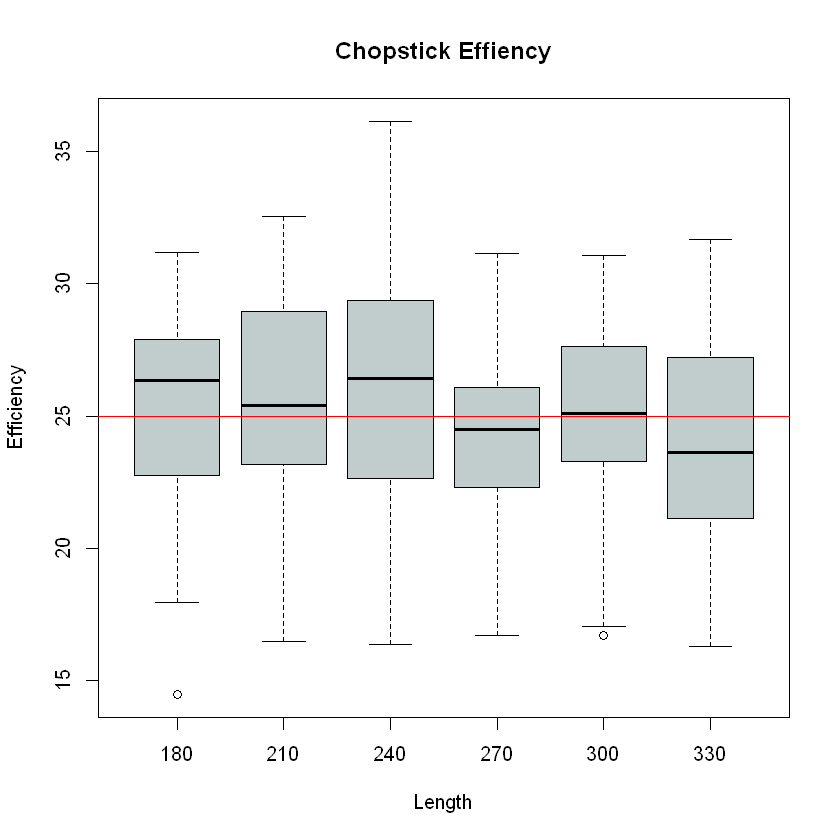

In [41]:
boxplot(chopsticks$Food.Pinching.Efficiency ~ chopsticks$Chopstick.Length, main = "Chopstick Effiency", xlab = "Length",
       ylab = "Efficiency", col = c("azure3"))

#Draw a line for the mean value of all efficiency values
abline(h = mean(chopsticks$Food.Pinching.Efficiency), col = "red")

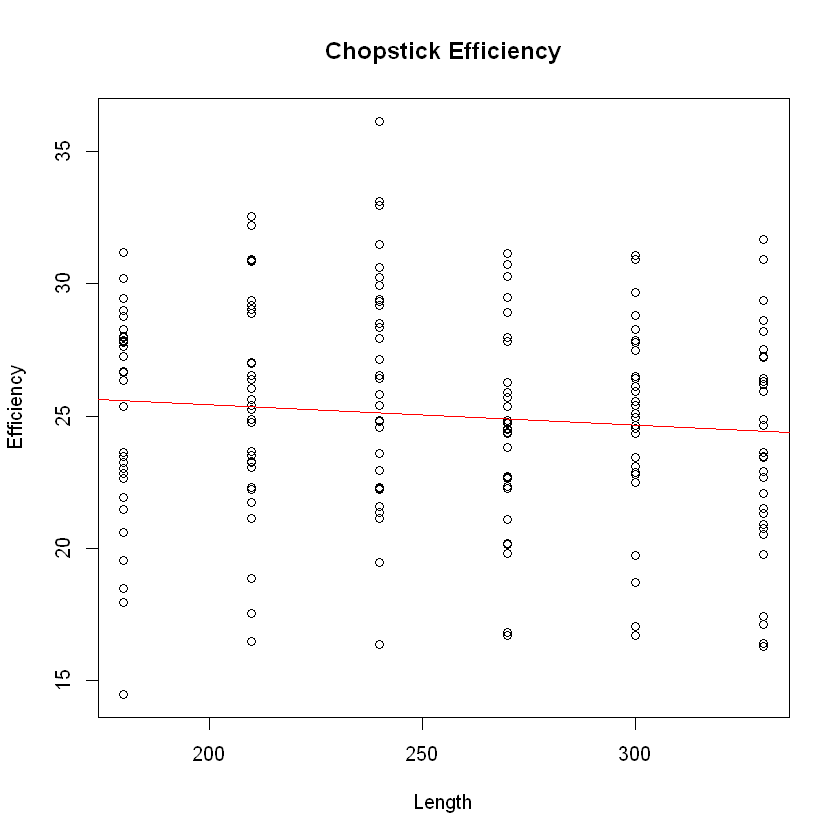

In [96]:
plot(chopsticks$Chopstick.Length, chopsticks$Food.Pinching.Efficiency,     
     main = "Chopstick Efficiency",
     ylab = "Efficiency",
     xlab = "Length")

#Plot the line of best fit across the data
regression <- lm(chopsticks$Food.Pinching.Efficiency ~ chopsticks$Chopstick.Length)
abline(regression, col = "red")

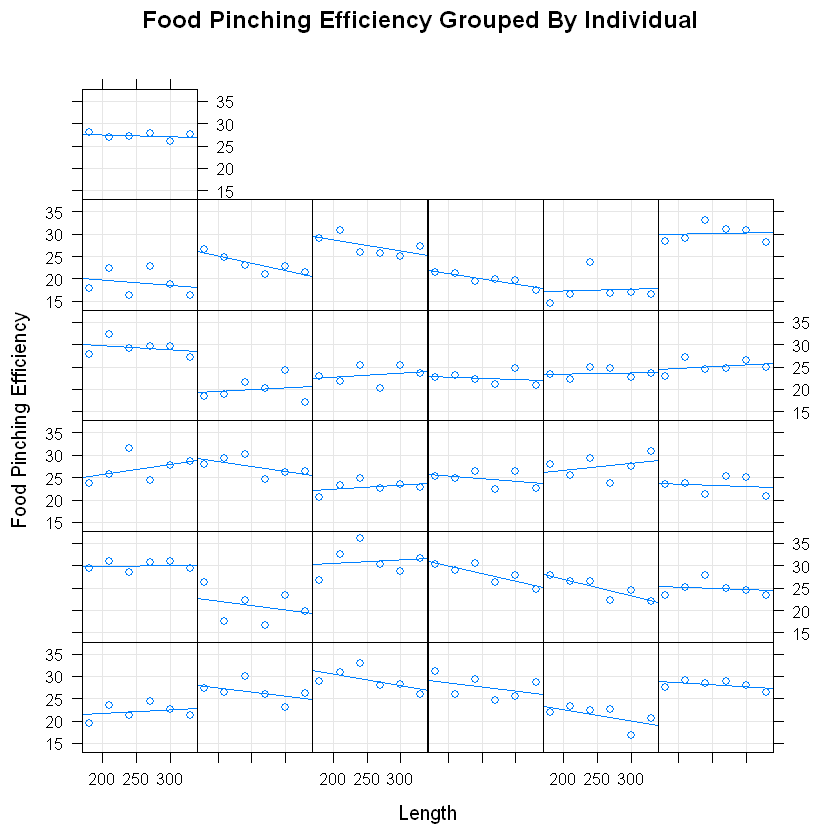

In [72]:
xyplot(chopsticks$Food.Pinching.Efficiency ~ chopsticks$Chopstick.Length | chopsticks$Individual, grid = TRUE, 
       strip = FALSE,
       type = c("p", "r"),
       xlab = "Length",
       ylab = "Food Pinching Efficiency",
       main = "Food Pinching Efficiency Grouped By Individual")

## Conclusion

Based on the above, one could conclude that across the whole sample, that 240mm chopsticks are most likely to work the best, and chopsticks grow less effective as they get longer. However, as noted in the individual grouping chart, some people experienced more efficacy as chopsticks grew longer. 